Printing some sample data from the iris dataset
(array([5.1, 3.5, 1.4, 0.2]), 0)
(array([4.9, 3. , 1.4, 0.2]), 0)
(array([4.7, 3.2, 1.3, 0.2]), 0)
(array([4.6, 3.1, 1.5, 0.2]), 0)
(array([5. , 3.6, 1.4, 0.2]), 0)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


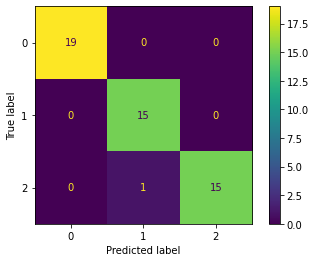

Evaluation report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Accuracy: 0.980000
Precision: 0.9791666666666666
Recall: 0.980000
F1 score: 0.980000
Cohens kappa: 0.969861


In [ ]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

## import the iris dataset for classification
 
from sklearn import datasets
iris=sklearn.datasets.load_iris()

## print some data, to see the imported dataset
 
print("Printing some sample data from the iris dataset")
for training_sample in list(zip(iris.data,iris.target))[:5]:
    print(training_sample)
 
## save the features and class
 
features=iris.data   # split iris dataset into features and iris_class
print(features)
iris_class=iris.target  # class[X] is output corresponding to features[X]
print(iris_class)
## Split the dataset into training (70%) and testing (30%)
## Note that the shuffle parameter has been used in splitting.
 
print("Splitting the data into testing and training samples")
from sklearn.model_selection import train_test_split
features_train, features_test,iris_class_train, iris_class_test = train_test_split(features,iris_class, test_size=0.33, random_state=42)
 
## data preprocessing: Before training the network we must scale the feature data
print("Data preprocessing")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features_train)
features_train_scale = scaler.transform(features_train)
features_test_scale = scaler.transform(features_test)
features_train
features_train_scale

## The MLPClassifier and MLPRegressor are sklearn implementations of NNs
 
from sklearn.neural_network import MLPClassifier
iterations=1000   # define the iterations for training over the dataset
hidden_layers=[10,10,10]  # define the layers/depth of the NN
 
mlp = MLPClassifier(hidden_layer_sizes=(hidden_layers), max_iter=iterations) 
 
# an object which represents the neural network
# Remember to use the pre-processed data and not original values for fit()
 
mlp.fit(features_train_scale, iris_class_train)  # fit features over NN
 
## Run the test data over the network to see the predicted outcomes.
 
predicted = mlp.predict(features_test_scale)  
print(predicted)
print(iris_class_test)
# predict over test data
## evaluation metrics and analysing the accuracy/output.
print("Evaluation: considering the confusion matrix")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(iris_class_test,predicted))  
# all non-diagonal elements are 0 if you get 100% accuracy

plot_confusion_matrix(mlp, features_test_scale, iris_class_test) 
plt.show()

print("Evaluation report:")
from sklearn.metrics import classification_report
print(classification_report(iris_class_test,predicted)) 
#f1-score/accuracy


from sklearn.metrics import accuracy_score 
accuracy=accuracy_score(y_true=iris_class_test, y_pred=predicted)
print('Accuracy: %f' % accuracy)


from sklearn.metrics import precision_score
precision=precision_score(y_true=iris_class_test, y_pred=predicted, average='macro')
print('Precision:', precision)

from sklearn.metrics import recall_score
recall = recall_score(y_true=iris_class_test, y_pred=predicted, average = 'micro')
print('Recall: %f' % recall)

from sklearn.metrics import f1_score
f1 = f1_score(y_true=iris_class_test, y_pred=predicted, average= 'micro')
print('F1 score: %f' % f1)

from sklearn.metrics import cohen_kappa_score 
kappa=cohen_kappa_score (y1= iris_class_test, y2= predicted)
print('Cohens kappa: %f' % kappa)

In [ ]:
print(features_train_scale.shape)
print(iris_class_train.shape)

(100, 4)
(100,)


In [ ]:
print(features_train_scale)
print(iris_class_train)

[[-0.13835603 -0.26550845  0.22229072  0.10894943]
 [ 2.14752625 -0.02631165  1.61160773  1.18499319]
 [-0.25866563 -0.02631165  0.39595535  0.37796037]
 [-0.8602136   1.16967238 -1.39857913 -1.37061074]
 [ 2.26783585 -0.50470526  1.66949594  1.05048772]
 [-0.01804644 -0.74390206  0.16440251 -0.29456698]
 [-0.739904    0.93047557 -1.39857913 -1.37061074]
 [-0.98052319  1.16967238 -1.45646733 -1.23610527]
 [-0.8602136   1.88726279 -1.10913808 -1.1015998 ]
 [-0.98052319 -2.4182797  -0.18292674 -0.29456698]
 [ 0.58350153 -0.74390206  0.62750818  0.78147678]
 [-1.22114238  0.93047557 -1.10913808 -1.37061074]
 [-0.98052319 -0.02631165 -1.28280271 -1.37061074]
 [-0.8602136   0.69127877 -1.2249145  -0.96709433]
 [-0.25866563 -0.74390206  0.22229072  0.10894943]
 [-0.8602136   0.93047557 -1.34069092 -1.37061074]
 [-0.13835603 -0.02631165  0.22229072 -0.02555604]
 [ 2.26783585  1.88726279  1.66949594  1.31949866]
 [-1.46176157  0.45208196 -1.39857913 -1.37061074]
 [ 0.46319194 -0.26550845  0.28